In [1]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from scipy.stats import mode
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#import the data

#your data path r"YOUR_DATA_PATH"
DATA_PATH = r"C:\Users\berky\model\corporateCreditRatingWithFinancialRatios.xls"
data = pd.read_csv(DATA_PATH)

In [3]:
# preview the dataset
data.head()

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [4]:
# inspect the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

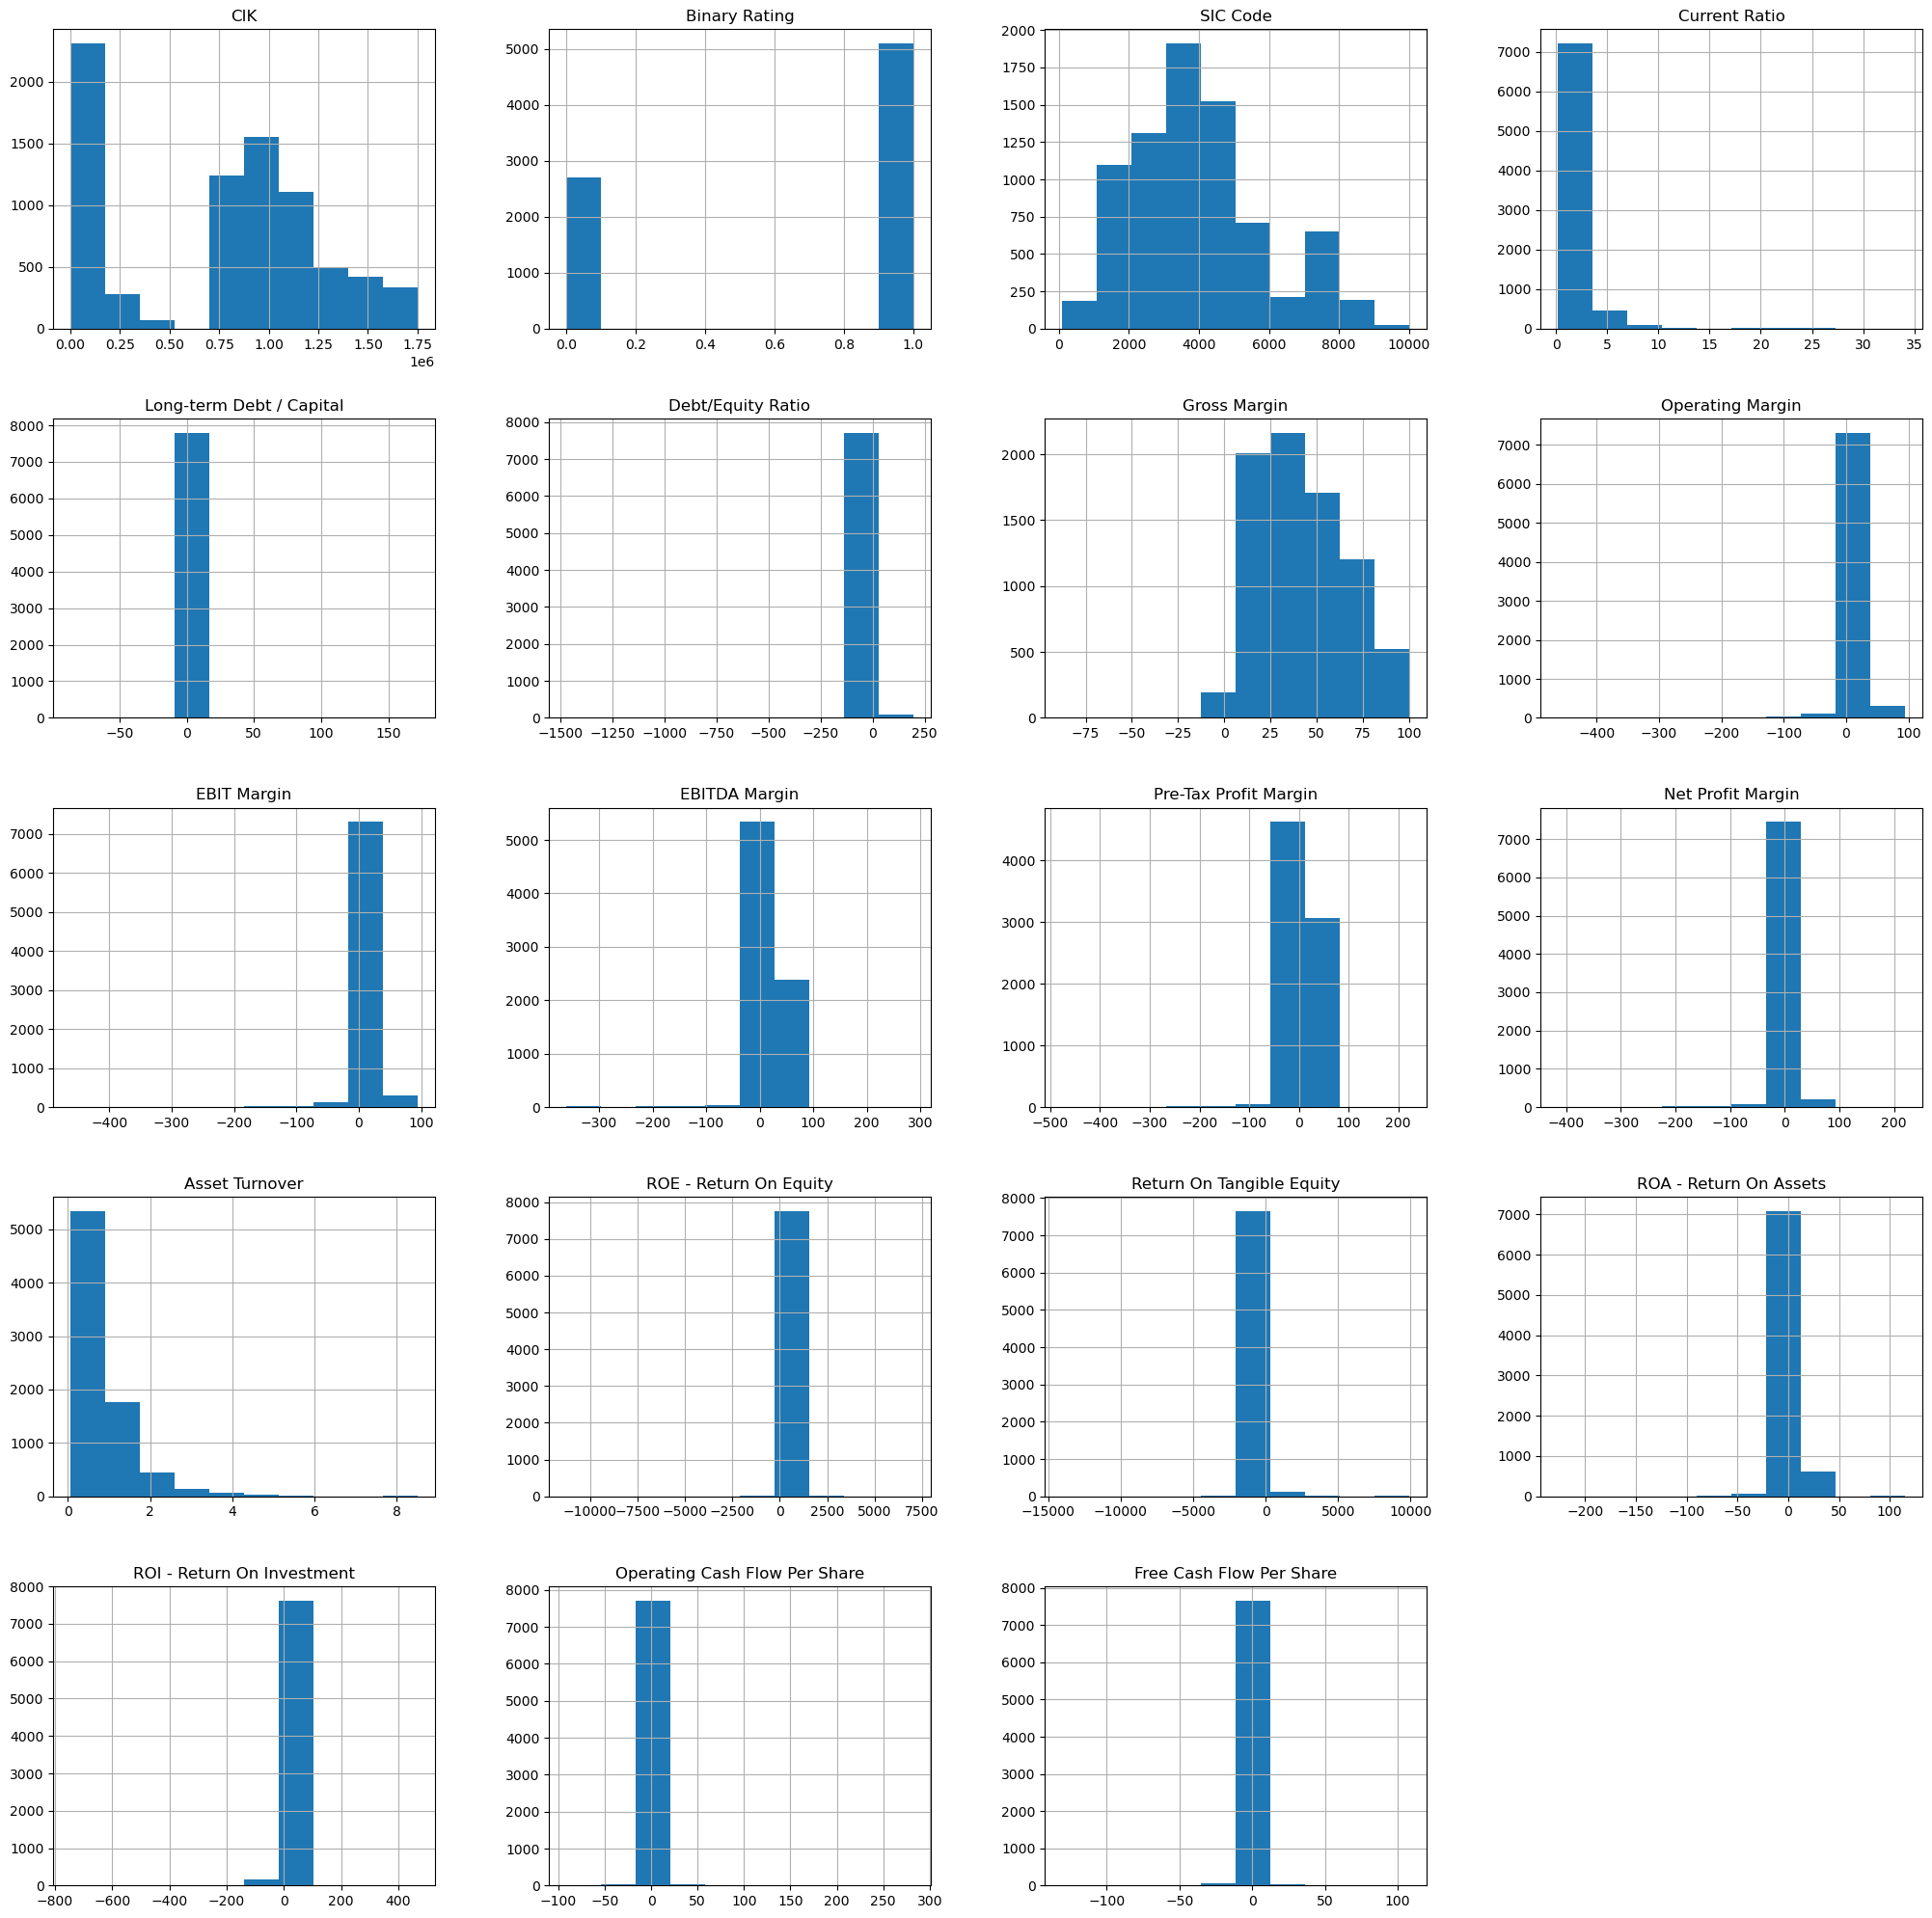

In [5]:
# inspect the distribution for each attribute in the dataset
ax = data.hist(figsize=(25,25))

In [6]:
corr_matrix = data.iloc[:, 9:].corr()
corr_matrix

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
Current Ratio,1.000000,-0.004422,0.007607,-0.119005,-0.039968,-0.040325,-0.095895,-0.036191,-0.018826,-0.049083,-0.022254,-0.008224,-0.002297,-0.025053,-0.021045,0.006524
Long-term Debt / Capital,-0.004422,1.000000,-0.004481,-0.000660,-0.010255,-0.010299,-0.007124,-0.015440,-0.017155,-0.010404,0.001803,-0.004122,-0.018936,0.551874,0.011356,0.012966
Debt/Equity Ratio,0.007607,-0.004481,1.000000,0.003872,0.001333,0.001393,-0.001535,0.007330,0.005694,-0.003112,0.462107,0.003809,0.008044,0.007103,0.007197,-0.003935
Gross Margin,-0.119005,-0.000660,0.003872,1.000000,0.180366,0.180612,0.364032,0.138797,0.109143,-0.505110,-0.000769,-0.028778,0.045433,0.018835,0.010243,-0.011238
Operating Margin,-0.039968,-0.010255,0.001333,0.180366,1.000000,0.999700,0.920759,0.916338,0.879209,-0.107301,-0.001834,0.012389,0.754847,0.423420,0.199485,-0.079138
EBIT Margin,-0.040325,-0.010299,0.001393,0.180612,0.999700,1.000000,0.921193,0.916165,0.879104,-0.108046,-0.001836,0.012313,0.754676,0.423368,0.202016,-0.079564
EBITDA Margin,-0.095895,-0.007124,-0.001535,0.364032,0.920759,0.921193,1.000000,0.819170,0.767419,-0.274075,-0.010407,0.005155,0.638675,0.362099,0.189693,-0.084401
Pre-Tax Profit Margin,-0.036191,-0.015440,0.007330,0.138797,0.916338,0.916165,0.819170,1.000000,0.965150,-0.049702,0.004329,0.026279,0.797267,0.447459,0.188690,-0.070633
Net Profit Margin,-0.018826,-0.017155,0.005694,0.109143,0.879209,0.879104,0.767419,0.965150,1.000000,-0.039706,0.011475,0.027545,0.787621,0.447371,0.180768,-0.076348
Asset Turnover,-0.049083,-0.010404,-0.003112,-0.505110,-0.107301,-0.108046,-0.274075,-0.049702,-0.039706,1.000000,0.024105,0.065913,0.113655,0.091659,0.017271,0.022692


In [7]:
# instantiate an inputer to fill empty values, if they exist, with the average
imputer = SimpleImputer(strategy='mean')

# we apply the inputer to the numerical columns on the copy of a dataset
data_imputed = data.copy()
numeric_columns = data_imputed.select_dtypes(include=['float64', 'int64']).columns
data_imputed[numeric_columns] = imputer.fit_transform(data_imputed[numeric_columns])

# encode categorical variables
categorical_columns = data_imputed.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col, le in label_encoders.items():
    data_imputed[col] = le.fit_transform(data_imputed[col])

# identify X and y columns
X = data_imputed.drop(columns=['Binary Rating', 'Rating'])
y = data_imputed['Binary Rating'] # use 'Binary Rating' as target

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# display the first few rows of the preprocessed dataset
pd.DataFrame(X_scaled, columns=X.columns).head()

,Rating Agency,Corporation,Rating Date,CIK,SIC Code,Sector,Ticker,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,1.012624,-1.501919,-2.266516,0.621676,0.474907,1.478474,-1.430202,-0.403644,0.000873,0.020530,...,0.365559,0.177621,0.096734,-0.764973,-0.033733,-0.028709,-0.209897,-0.107590,0.250559,-0.034852
1,1.012624,-1.401681,-2.251855,-1.416414,1.775470,-1.673453,-1.681879,-0.423316,-0.169496,-0.004936,...,0.158597,0.438188,0.314851,-0.743282,0.026390,0.055768,-0.008809,0.607060,-0.037958,0.026707
2,1.012624,-1.386645,-2.219599,-1.416048,0.541192,0.905397,-1.450747,0.000670,-0.061013,0.007202,...,-0.674261,-0.201199,-0.160213,2.315788,-0.010031,-0.010120,0.075563,0.105548,-1.336750,-1.026112
3,1.012624,-1.045836,-2.275313,0.579481,0.474907,1.478474,-0.849804,-0.567524,0.006845,0.022399,...,0.322665,0.231604,0.125926,-0.797580,-0.027363,-0.025459,-0.207752,-0.080978,0.208925,-0.140544
4,1.012624,-1.010752,-2.272381,-0.030702,0.571661,0.905397,-1.209342,-0.329536,-0.071664,0.006567,...,-0.758313,-0.266630,-0.222157,5.857507,-0.020925,-0.004459,-0.177620,0.045459,0.246725,0.316813


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# display sorted VIF values to identify multicollinearity
vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
12,EBIT Margin,1706.838440
11,Operating Margin,1700.998744
14,Pre-Tax Profit Margin,21.518199
15,Net Profit Margin,15.488553
13,EBITDA Margin,10.611327
6,Ticker,6.200938
1,Corporation,6.199207
19,ROA - Return On Assets,4.689609
20,ROI - Return On Investment,3.221048
8,Long-term Debt / Capital,2.023931


In [11]:
# identify the features with high VIF and remove them from the set of predictors
collinear_features = ["Operating Margin", "EBITDA Margin", "Net Profit Margin", "Pre-Tax Profit Margin"]
X_reduced = X.drop(columns=collinear_features)

#
X_reduced_scaled = scaler.fit_transform(X_reduced)
vif_reduced = pd.DataFrame()
vif_reduced["Feature"] = X_reduced.columns
vif_reduced["VIF"] = [variance_inflation_factor(X_reduced_scaled, i) for i in range(X_reduced_scaled.shape[1])]

# display reduced VIF values in order
vif_reduced.sort_values(by="VIF", ascending=False)

,Feature,VIF
6,Ticker,6.197512
1,Corporation,6.195255
15,ROA - Return On Assets,4.129927
16,ROI - Return On Investment,3.203577
11,EBIT Margin,2.800876
8,Long-term Debt / Capital,2.018485
12,Asset Turnover,1.513221
10,Gross Margin,1.421366
13,ROE - Return On Equity,1.280956
9,Debt/Equity Ratio,1.274480


In [12]:
#~ 70/20/10 split 
#72/18/10

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_scaled, y, test_size=0.1, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# K-Nearest Neighbor

In [14]:
#Scikit Learn
# initialize knn
knn = KNeighborsClassifier(n_neighbors=5)

# train the model and make predictions
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# generate a report
knn_report = classification_report(y_test, knn_predictions)

# display the report's results
print(knn_report)

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       263
         1.0       0.90      0.93      0.91       518

    accuracy                           0.88       781
   macro avg       0.88      0.86      0.87       781
weighted avg       0.88      0.88      0.88       781



In [15]:
from knn_first_implementation import KnClassification
#cross validation
def k_fold_cross_validation(X, y, K, num_folds):
    fold_size = len(X) // num_folds
    mse_scores = []
    for fold in range(num_folds):
        y_pred = KnClassification(K, X_train, y_train, X_val)
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)
    return np.mean(mse_scores)

In [26]:
average_mse = k_fold_cross_validation(X_train, y_train, K=6, num_folds=7)
print("Average MSE from cross-validation:", average_mse)

Average MSE from cross-validation: 0.1380782918149466


In [28]:
K_max = 20
mse_score = []
lowest_score = float('inf')
lowest_k = None

for i in range(1, K_max):
    score = k_fold_cross_validation(X_train, y_train, K=i, num_folds=5)
    mse_score.append(score)
    if score < lowest_score:
        lowest_score = score
        lowest_k = i

print("MSE scores for each K:", mse_score)
print("Lowest MSE score:", lowest_score)
print("Optimal K with the lowest MSE:", lowest_k)

MSE scores for each K: [0.07544483985765124, 0.09323843416370106, 0.10462633451957296, 0.11530249110320283, 0.12028469750889678, 0.13807829181494663, 0.14163701067615658, 0.1501779359430605, 0.1494661921708185, 0.15658362989323843, 0.1594306049822064, 0.16227758007117438, 0.1594306049822064, 0.1701067615658363, 0.17580071174377224, 0.18505338078291814, 0.18647686832740212, 0.18576512455516014, 0.19359430604982206]
Lowest MSE score: 0.07544483985765124
Optimal K with the lowest MSE: 1


In [29]:
#plotting the values 

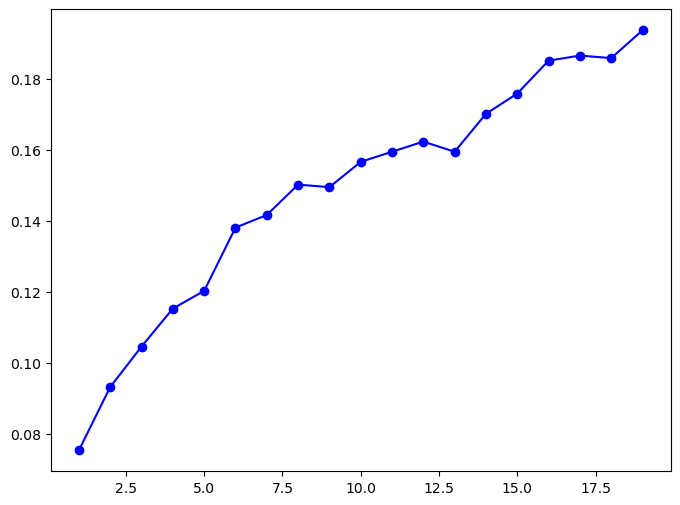

In [30]:
plt.figure(figsize = (8,6))
plt.plot(range(1, K_max,1), mse_score, marker = "o", color = "blue", linestyle = "-")

In [31]:
# Assuming KnClassifier is already defined
optimal_k = lowest_k

# Use the optimal K to make predictions on X_test
y_pred = KnClassification(optimal_k, X_train, y_train, X_test)

In [32]:
# Evaluate the predictions (if y_test is available)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with optimal K:", accuracy)

Test Accuracy with optimal K: 0.93854033290653


In [33]:
#Another Implementation of KNN
#This is similar to one sckit learn uses

MSE scores for each K: [0.07544483985765124, 0.09323843416370106, 0.10462633451957296, 0.11530249110320283, 0.12028469750889678, 0.13807829181494663, 0.14163701067615658, 0.1501779359430605, 0.1494661921708185, 0.15658362989323843, 0.1594306049822064, 0.16227758007117438, 0.1594306049822064, 0.1701067615658363, 0.17580071174377224, 0.18505338078291814, 0.18647686832740212, 0.18576512455516014, 0.19359430604982206]
Lowest MSE score: 0.07544483985765124
Optimal K with the lowest MSE: 1


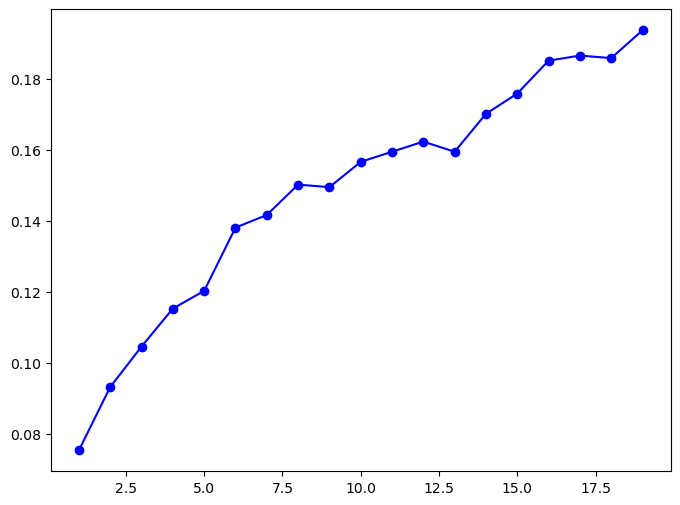

In [34]:
from knn_second_implementation import KnClassification_v2
#cross validation
def k_fold_cross_validation(X, y, K, num_folds):
    fold_size = len(X) // num_folds
    mse_scores = []
    for fold in range(num_folds):
        y_pred = KnClassification_v2(K, X_train, y_train, X_val)
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)
    return np.mean(mse_scores)


K_max = 20
mse_score = []
lowest_score = float('inf')
lowest_k = None

for i in range(1, K_max):
    score = k_fold_cross_validation(X_train, y_train, K=i, num_folds=5)
    mse_score.append(score)
    if score < lowest_score:
        lowest_score = score
        lowest_k = i

print("MSE scores for each K:", mse_score)
print("Lowest MSE score:", lowest_score)
print("Optimal K with the lowest MSE:", lowest_k)

plt.figure(figsize = (8,6))
plt.plot(range(1, K_max,1), mse_score, marker = "o", color = "blue", linestyle = "-")


In [35]:
# Assuming KnClassifier is already defined
optimal_k = lowest_k

# Use the optimal K to make predictions on X_test
y_pred = KnClassification_v2(optimal_k, X_train, y_train, X_test)

In [36]:
# Evaluate the predictions (if y_test is available)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with optimal K:", accuracy)

Test Accuracy with optimal K: 0.93854033290653


# Logistic Regression

In [38]:
# initialize logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# train the model and make predictions
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

# generate a report
log_reg_report = classification_report(y_test, log_reg_predictions)

# display the report's results
print(log_reg_report)

              precision    recall  f1-score   support

         0.0       0.76      0.56      0.65       263
         1.0       0.80      0.91      0.85       518

    accuracy                           0.79       781
   macro avg       0.78      0.74      0.75       781
weighted avg       0.79      0.79      0.78       781



In [39]:
from logistic_regression import LogisticRegression


In [40]:
model = LogisticRegression(learning_rate=3, number_of_iterations=1000)

In [41]:
# Train the model
model.train(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8002560819462228


# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [45]:
random_forest_classifier = RandomForestClassifier(
    n_estimators = 40,
    random_state = 100
)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=100)

In [46]:
# Predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

In [47]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9603072983354674
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       263
         1.0       0.96      0.98      0.97       518

    accuracy                           0.96       781
   macro avg       0.96      0.95      0.96       781
weighted avg       0.96      0.96      0.96       781



# Support Vector Machines

In [49]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#creating a svm classifier
# svm_classifier = svm.SVC(kernel = "linear") #0.8220
#svm_classifier = svm.SVC(kernel = "sigmoid") #0.6517
#svm_classifier = svm.SVC(kernel = "poly") #0.7989
svm_classifier = svm.SVC(kernel = "rbf") #0.8591
svm_classifier.fit(X_train, y_train)

y_predictions = svm_classifier.predict(X_test)
#model evaluation
accuracy_svm = accuracy_score(y_test, y_predictions)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8591549295774648


# Decision Tree Classifier

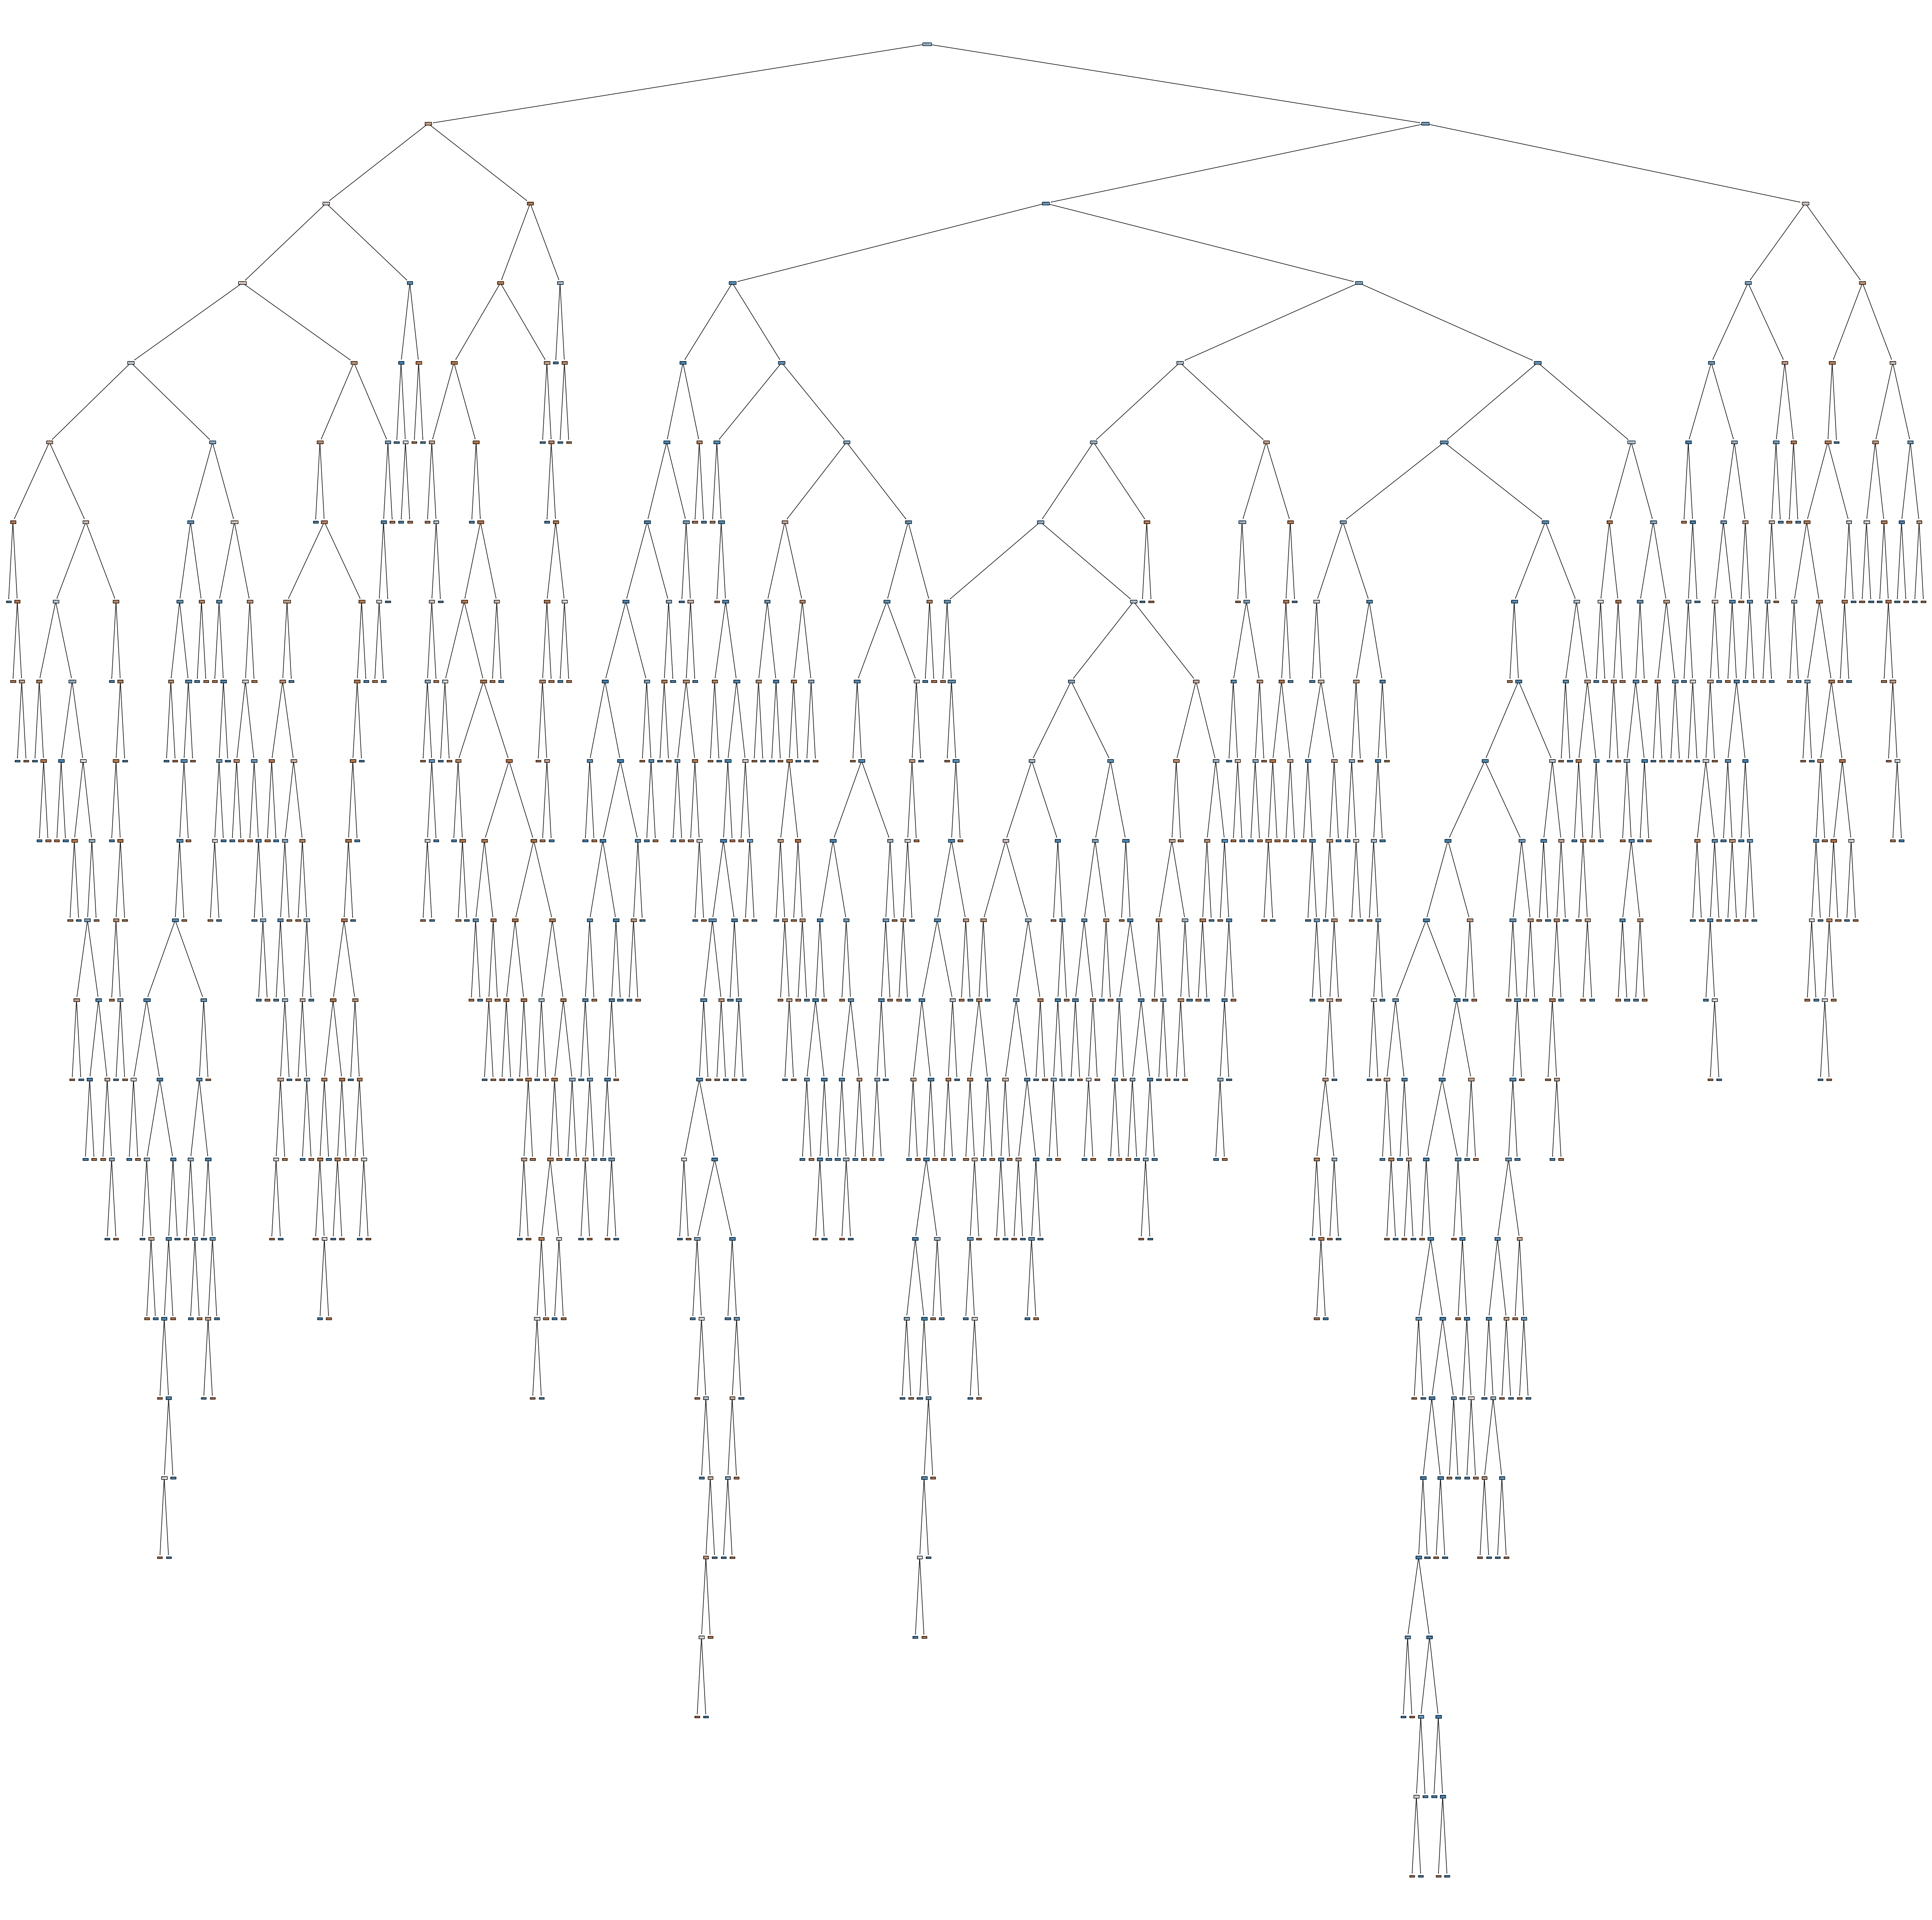

In [51]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion = "gini").fit(X_train, y_train)
plt.figure(figsize=(60, 60))
plot_tree(decision_tree_classifier, filled=True) 
plt.show();

# Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [54]:
#gaussian continuous features
gaussian_nb = GaussianNB()

#train the classifier
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [55]:
y_predicitons = gaussian_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_predicitons)
print("Accuracy:", accuracy)

Accuracy: 0.7093469910371318
